import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv('kc_house_data.csv.zip')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1]:
df.describe()

NameError: name 'df' is not defined

In [7]:
#checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

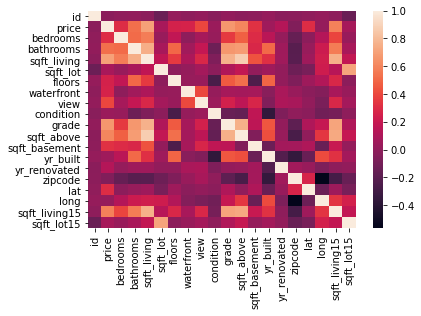

In [8]:
# check for any correlations between variables
corr = df.corr()
sns.heatmap(corr)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a 
# high influence in price

In [9]:
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [31]:
#creating x and y variables
x = np.array(df['sqft_living15'])     #input
y = np.array(df['price'])           #output
x = x.reshape(-1,1)
y = y.reshape(-1,1)

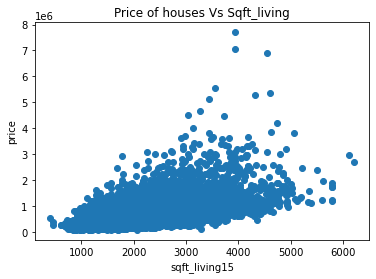

In [32]:

#visualization
plt.scatter(x,y)
plt.title('Price of houses Vs Sqft_living')
plt.xlabel('sqft_living15')
plt.ylabel("price")
plt.show()

In [15]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2) 
# the test set will be 20% of the whole data set

In [16]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [18]:
#intercept and co-efficient
print(linreg.coef_.flatten() , linreg.intercept_)
 # for an increase of 1 square meter in house size,
# the house price will go up by ~$280, on average

[280.81180748] [-44787.713594]


In [19]:
linreg.coef_.flatten()

array([280.81180748])

In [20]:
# manually
price = -44787.713594 + 1000*280.81180748

In [21]:
price

236024.09388600002

In [25]:
#making array of predicted data
y_predict = linreg.predict(x_test)

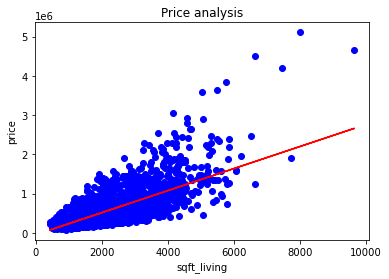

In [35]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_predict, color='red')
plt.title('Price analysis')
plt.xlabel('sqft_living')
plt.ylabel("price")
plt.show()

In [29]:
mse = mean_squared_error(y_test, linreg.predict(x_test))

In [30]:
print(np.sqrt(mse))
print(linreg.score(x_test, y_test))

257755.13385732373
0.5017601807706868
